# Introducción a librerías de DataScience en Python: Kmeans con Sklearn

En este curso haremos una revisión del algoritmo de kmeans y resolveremos un ejemplode clasificación de variables meteoceánicas utilizando la librería de Python Sklearn.

- [Accseso a datos](#Acceso-a-datos)
- [Exploración de datos](#Exploración-de-datos)
- [Método K Means](#Método-K-Means)
    - [Revisión del método](#Revisión-del-método)
    - [Aplicación del método con librerías de Python](#Aplicación-del-método-con-librerías-de-Python)
    - [Elección de k](#Elección-de-k)
        - [Método del codo](#Método-del-códo)
        - [Método de "silhouette coefficients"](#Método-de-"silhouette-coefficients")
- [Comparación de métodos](#Comparación-de-métodos)
    - [Método DBSCAN](#Método-DBSCAN)

# Acceso a datos

In [1]:
from pydap.cas.get_cookies import setup_session
from pydap.client import open_url
import xarray as xr
import getpass

#Atlantic -Iberian Biscay Irish- Ocean Wave Reanalysis
url1 = "https://my.cmems-du.eu/thredds/dodsC/cmems_mod_ibi_wav_my_0.05deg-2D_PT1H-i"

#url1b = "https://my.cmems-du.eu/thredds/dodsC/cmems_mod_glo_phy_anfc_merged-uv_PT1H-i" #corrupted
url1b = "https://nrt.cmems-du.eu/thredds/dodsC/cmems_mod_glo_phy_anfc_merged-uv_PT1H-i_Prev" #previous version

#Global Ocean Hourly Sea Surface Wind and Stress from Scatterometer and Model
url3 = "https://nrt.cmems-du.eu/thredds/dodsC/cmems_obs-wind_glo_phy_nrt_l4_0.125deg_PT1H"


#Atlantic-Iberian Biscay Irish- Ocean Physics Reanalysis
url2 = "https://my.cmems-du.eu/thredds/dodsC/cmems_mod_ibi_phy_my_0.083deg-2D_PT1H-m"


username = "aturlione" 
password = getpass.getpass('Enter your password: ')

Enter your password: ········


In [2]:
#iniciar sesión
cas_url = "https://cmems-cas.cls.fr/cas/login"      
session = setup_session(cas_url, username, password)
session.cookies.set("CASTGC", session.cookies.get_dict()["CASTGC"]) 
#needed to keep the session alive, CAS: Central Authentication Service, TGC:Long Term Authentication

def data_access(url, username, password):
    print('Accediendo a los datos {}'.format(url[-9:]))
    data_store = xr.backends.PydapDataStore(open_url(url, session=session))
    ds = xr.open_dataset(data_store)
    print('Accediendo a datos finalizado')
    return ds

In [3]:
ds1=data_access(url1, username, password) 

Accediendo a los datos 2D_PT1H-i
Accediendo a datos finalizado


In [4]:
#ds2=data_access(url2, username, password) 

In [5]:
ds3=data_access(url1b, username, password) 

Accediendo a los datos 1H-i_Prev
Accediendo a datos finalizado


In [6]:
ds4=data_access(url3, username, password) 

Accediendo a los datos 5deg_PT1H
Accediendo a datos finalizado


# Exploración de datos

In [7]:
print('Inside ds1:')
print('--------------------------------\n')
for var in ds1.variables:
    print(var,':',ds1[var].attrs['standard_name'],'\n')  

Inside ds1:
--------------------------------

latitude : latitude 

longitude : longitude 

VHM0 : sea_surface_wave_significant_height 

VHM0_SW1 : sea_surface_primary_swell_wave_significant_height 

VHM0_SW2 : sea_surface_secondary_swell_wave_significant_height 

VHM0_WW : sea_surface_wind_wave_significant_height 

VMDR : sea_surface_wave_from_direction 

VMDR_SW1 : sea_surface_primary_swell_wave_from_direction 

VMDR_SW2 : sea_surface_secondary_swell_wave_from_direction 

VMDR_WW : sea_surface_wind_wave_from_direction 

VPED : sea_surface_wave_from_direction_at_variance_spectral_density_maximum 

VSDX : sea_surface_wave_stokes_drift_x_velocity 

VSDY : sea_surface_wave_stokes_drift_y_velocity 

VTM01_SW1 : sea_surface_primary_swell_wave_mean_period 

VTM01_SW2 : sea_surface_secondary_swell_wave_mean_period 

VTM01_WW : sea_surface_wind_wave_mean_period 

VTM02 : sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment 

VTM10 : sea_surface_wave_mean_period_

In [8]:
print('Inside ds2:')
print('--------------------------------\n')
for var in ds2.variables:
    print(var,':',ds2[var].attrs['standard_name'],'\n')  

Inside ds2:
--------------------------------

longitude : longitude 

latitude : latitude 

time : time 

thetao : sea_water_potential_temperature 

ubar : barotropic_eastward_sea_water_velocity 

uo : eastward_sea_water_velocity 

vbar : barotropic_northward_sea_water_velocity 

vo : northward_sea_water_velocity 

zos : sea_surface_height_above_geoid 

mlotst : ocean_mixed_layer_thickness_defined_by_sigma_theta 



In [9]:
print('Inside ds3:')
print('--------------------------------\n')
for var in ds3.variables:
    print(var,':',ds3[var].attrs['standard_name'],'\n')  

Inside ds3:
--------------------------------

longitude : longitude 

latitude : latitude 

depth : depth 

time : time 

uo : eastward_sea_water_velocity 

vo : northward_sea_water_velocity 

vsdx : sea_surface_wave_stokes_drift_x_velocity 

vsdy : sea_surface_wave_stokes_drift_y_velocity 

utide : surface_sea_water_x_velocity_due_to_tide 

vtide : surface_sea_water_y_velocity_due_to_tide 

utotal : surface_sea_water_x_velocity 

vtotal : surface_sea_water_y_velocity 



In [10]:
print('Inside ds4:')
print('--------------------------------\n')
for var in ds4.variables:
    print(var,':',ds4[var].attrs['standard_name'],'\n')

Inside ds4:
--------------------------------

lat : latitude 

lon : longitude 

time : time 

eastward_wind : eastward_wind 

eastward_wind_bias : eastward_wind_bias 

eastward_wind_sdd : eastward_wind_standard_deviation_of_differences 

northward_wind : northward_wind 

northward_wind_bias : northward_wind_bias 

northward_wind_sdd : northward_wind_standard_deviation_of_differences 

wind_divergence : divergence_of_wind 

wind_divergence_bias : divergence_of_wind_bias 

wind_divergence_dv : divergence_of_wind_difference_of_variances 

wind_curl : atmosphere_relative_vorticity 

wind_curl_bias : atmosphere_relative_vorticity_bias 

wind_curl_dv : atmosphere_relative_vorticity_difference_of_variances 

eastward_stress : surface_downward_eastward_stress 

eastward_stress_bias : surface_downward_eastward_stress_bias 

eastward_stress_sdd : surface_downward_eastward_stress_standard_deviation_of_differences 

northward_stress : surface_downward_northward_stress 

northward_stress_bias : su

## Graficamos algunas de las variables

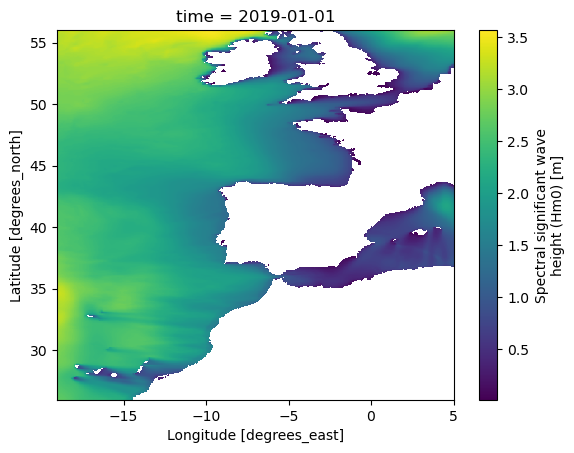

In [11]:
ds1.VHM0.loc['2019-01-01T00:00:00.000000000', :, :].plot() 

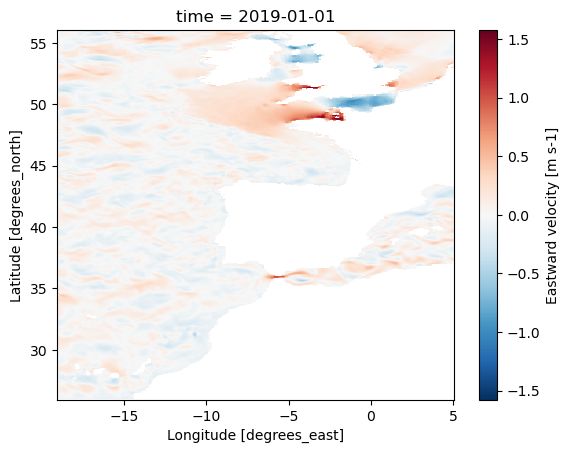

In [12]:
ds2.uo.interp(time=['2019-01-01T00:00:00.000000000'], method='linear').plot() 

# Pre-proceso

- Seleccionamos dos de las variables para hacer el clustering, en este caso HS y TP

In [8]:
lat = 30
long = -15

date_i='2020-08-01T00:00:00.000000000'
date_f='2020-10-01T00:00:00.000000000'
date_i2='2020-07-31T00:30:00.000000000'
date_f2='2020-10-01T00:30:00.000000000'

DIR = ds1.VMDR.loc[date_i:date_f, lat, long]
HS = ds1.VHM0.loc[date_i:date_f,  lat, long]
TP = ds1.VTM01_SW1.loc[date_i:date_f,  lat, long]

In [10]:
print('interpolation 1')
U=ds3.utotal.loc[date_i2:date_f2, :,lat,long]
U = U.interp(time=DIR.time.values[:], method='linear')

interpolation 1


In [11]:
print('interpolation 2')
V=ds3.vtotal.loc[date_i2:date_f2, :,lat,long]
V = V.interp(time=DIR.time.values[:], method='linear')

interpolation 2


In [12]:
EW=ds4.eastward_wind.loc[date_i:date_f].sel(lat=lat, lon=long, method="nearest")

In [13]:
print('DIR:',DIR.attrs['standard_name'])
print('HS:',HS.attrs['standard_name'])
print('TP:',TP.attrs['standard_name'])
print('U:',U.attrs['standard_name'])
print('V:',V.attrs['standard_name'])
print('EW:',EW.attrs['standard_name'])

DIR: sea_surface_wave_from_direction
HS: sea_surface_wave_significant_height
TP: sea_surface_primary_swell_wave_mean_period
U: surface_sea_water_x_velocity
V: surface_sea_water_y_velocity
EW: eastward_wind


In [14]:
#We must reshape U and V to create the data frame
Ur=U.values.reshape(len(U))
Vr=V.values.reshape(len(U))

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
import numpy as np

X=np.array([DIR,HS,TP,Ur,Vr,EW]).T
    
def pre_processing(X,PCAs,n_comp=None):
    # Standardize data
    X_s=StandardScaler().fit_transform(X)

    # Normalizing the Data 
    X_n= normalize(X_s) 
    Xdf=pd.DataFrame(X_n)      

    if PCAs==True:        
        # Reducing the dimensions of the data 
        pca = PCA(n_components = n_comp) 
        X_principal = pca.fit_transform(X_n) 
        X_principal = pd.DataFrame(X_principal) 
        X_principal.columns = ['P1', 'P2'] 
        
        X_p=X_principal
        

    else:
        X_p=Xdf
        #X_p.columns = ['DIR','HS','TP','U','V','EW'] 
        
    return X_p

## Gráficos PCAS

In [16]:
scaler = StandardScaler()
X_s=scaler.fit_transform(X)
X_n= normalize(X_s) 
pca = PCA() 
X_principal = pca.fit_transform(X_n) 

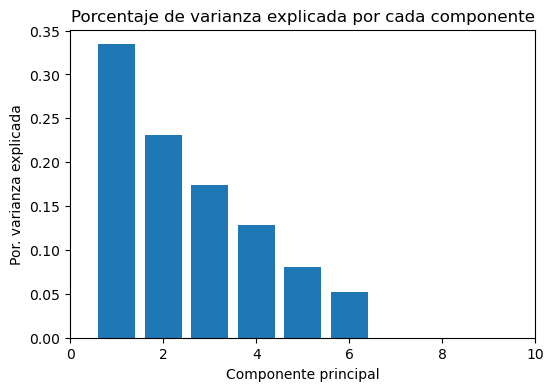

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(pca.n_components_) + 1,
    height = pca.explained_variance_ratio_
)

ax.set_xlim(0, 10)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

Text(0.5, 0, 'Componente principal')

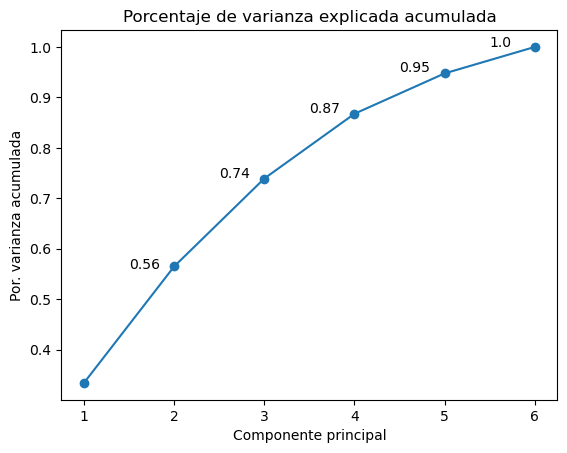

In [18]:
prop_varianza_acum = pca.explained_variance_ratio_.cumsum()

fig, ax = plt.subplots(1, 1)
ax.plot(
    np.arange(len(X[0,:])) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for i in range(1,len(prop_varianza_acum)):
    y = prop_varianza_acum[i]
    label = round(y, 2)
    ax.text(i+0.5,label, str(label), fontsize=10, color='black')

plt.title('Porcentaje de varianza explicada acumulada')   
plt.ylabel('Por. varianza acumulada')
plt.xlabel('Componente principal')

# Kmeans

- Utilizamos la librería sklearn para aplicar el Kmeans. Lo primero que tenemos que hacer es escalar los datos.

In [65]:
import pandas as pd
from sklearn.metrics import silhouette_score

X_p=pre_processing(X,False)
X_pca=pre_processing(X,True,2)


def km(k,X):   
    
    kmeans = KMeans(
        n_clusters=k, init="k-means++",
        n_init=10, max_iter=200,
        tol=1e-04, random_state=10
    ).fit(X)


    etiquetas = kmeans.labels_

    # lowest SSE value
    inertia=kmeans.inertia_
        
    return (kmeans,etiquetas,inertia)

In [66]:
result,etiquetas,inertia=km(4,X_p)
ss=silhouette_score(X_p, etiquetas)

result_pca,etiquetas_pca,inertia_pca=km(3,X_pca)
ss_pca=silhouette_score(X_pca, etiquetas_pca)

In [67]:
X_p['Etiquetas_pca']=etiquetas_pca
X_p['Etiquetas']=etiquetas_pca

In [68]:
result.cluster_centers_

array([[-0.32113114, -0.06727673, -0.30889092, -0.23838663,  0.4441734 ,
        -0.19601824],
       [-0.39152857, -0.18669285, -0.44008555,  0.20687356, -0.23378581,
         0.04417736],
       [ 0.54516239, -0.242197  ,  0.22155264,  0.18403505,  0.08965566,
         0.25499579],
       [-0.2500061 ,  0.48116845,  0.1491109 , -0.21091384, -0.29513557,
        -0.2828056 ]])

# Calidad del ajuste

SSE: sum of square error

\begin{equation}
SSE = \sum_{i=1}^{n} (X_i-\bar{X})^2
\end{equation}

[silhouette coefficients](https://es.wikipedia.org/wiki/Silhouette_(clustering)) 

Distancia media de los puntos dentro de un cluster:

\begin{equation}
a(i)=\frac{1}{|C_I|-1}\sum_{j \in C_I, i\neq j} d(i,j)
\end{equation}

Distancia mínima del a los puntos de los otros clasters:

\begin{equation}
b(i)= min\frac{1}{|C_k|}\sum_{j \in C_k} d(i,j), \ \ k\neq I
\end{equation}

La "silhpuette" para un punto i es:

\begin{equation}
s(i)= \frac{b(i)-a(i)}{max (b(i),a(i))}, \ \ si |C_I| > 1
\end{equation}

In [69]:
print('inertia: ',inertia,'ss: ',ss)

inertia:  724.1888254008936 ss:  0.2677064373140455


In [70]:
print('inertia pca: ',inertia_pca,'ss pca: ',ss_pca)

inertia pca:  212.05511464351463 ss pca:  0.5059610222668964


## Elegir k

C:\Users\turlionear\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\turlionear\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


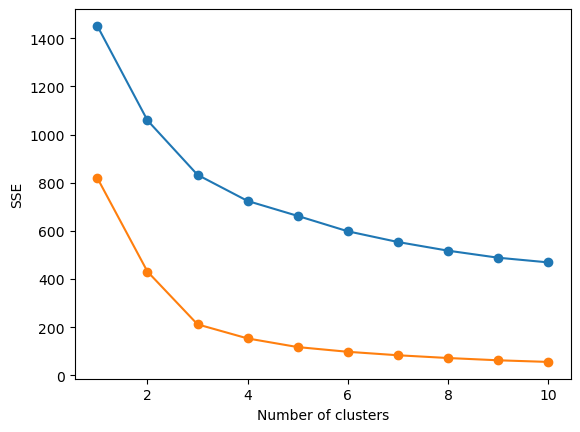

In [24]:
# calculate distortion for a range of number of cluster
SSE = []
SSE_pca = []

for k in range(1, 11):

    SSE.append(km(k,X_p)[2])
    SSE_pca.append(km(k,X_pca)[2])

# plot
plt.plot(range(1, 11), SSE, marker='o')
plt.plot(range(1, 11), SSE_pca, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [25]:
from kneed import KneeLocator, DataGenerator as dg 
kl = KneeLocator(
        range(1, 11), SSE, curve="convex", direction="decreasing"
       )

k2 = KneeLocator(
        range(1, 11), SSE_pca, curve="convex", direction="decreasing"
       )

kl.elbow,k2.elbow 

(3, 3)

# Resultados

Graficamos los resultados:

- Utilizamos Seaborn para hacer pair plots

- Podemos volver a hacer el pairs plot, esta vez con las clasificaciones. Referencia colores: [palettes](https://seaborn.pydata.org/tutorial/color_palettes.html)

In [27]:
import seaborn as sns
#add plot in PCA space

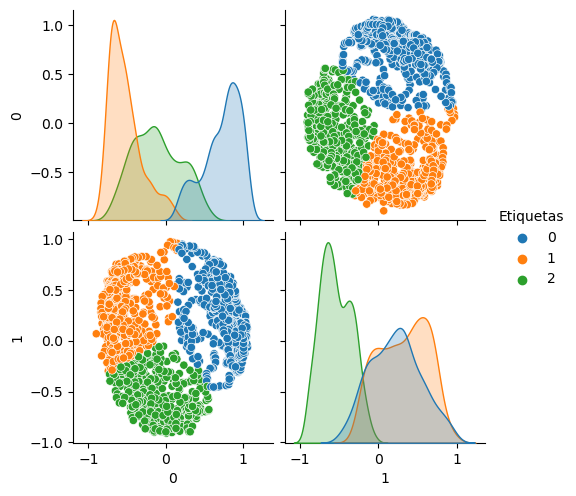

In [33]:
sns.pairplot(X_pca,hue="Etiquetas",palette='tab10')

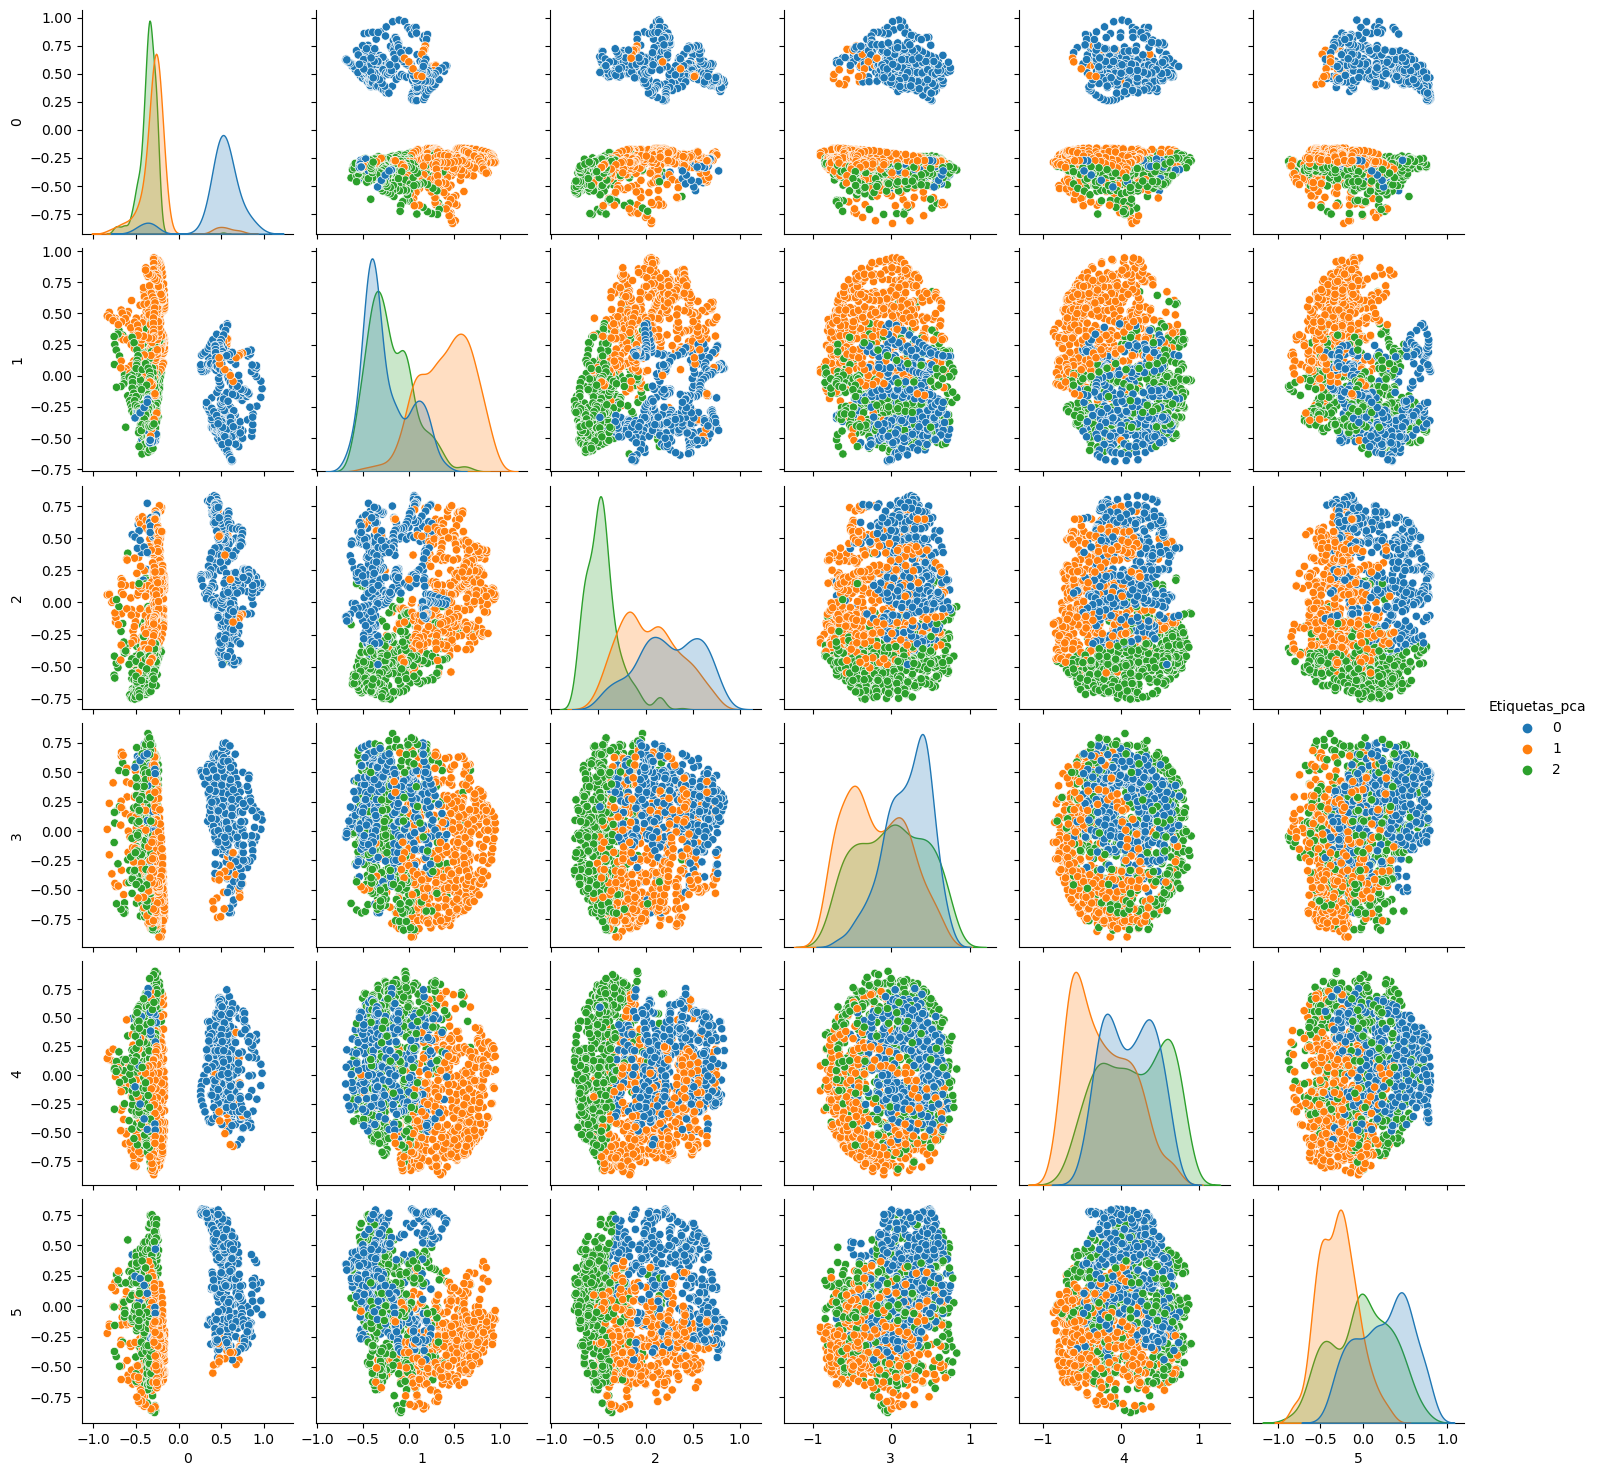

In [85]:
sns.pairplot(X_p[X_p.columns[:-1]],hue="Etiquetas_pca",palette='tab10')

# Comparación de métodos

## Método [DBSCAN](https://es.wikipedia.org/wiki/DBSCAN)

Revisión del método. Completar ...

In [49]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score

def db(X,eps): 

    # Instantiate k-means and dbscan algorithms and Fit the algorithms to the features
    result = DBSCAN(eps=eps, min_samples=3).fit(X)

    # Compute the silhouette scores for each algorithm
    dbscan_silhouette = silhouette_score(X, result.labels_)
    
    return( result.labels_,dbscan_silhouette)

C:\Users\turlionear\Anaconda3\envs\seminario_kMeans\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\turlionear\Anaconda3\envs\seminario_kMeans\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\turlionear\Anaconda3\envs\seminario_kMeans\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\turlionear\Anaconda3\envs\seminario_kMeans\lib

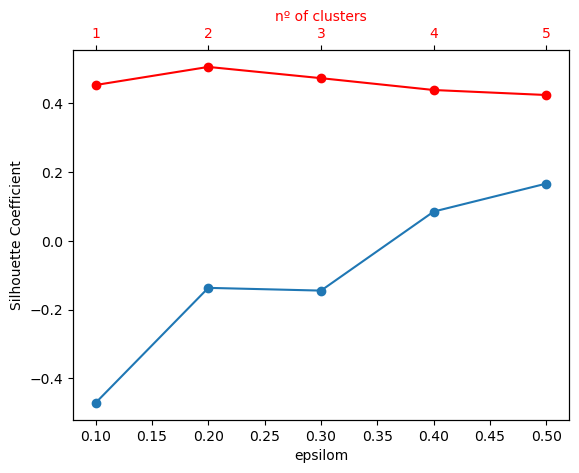

In [51]:
from sklearn.metrics import silhouette_score

silhouette_coefficients_sb = []
silhouette_coefficients_km = []
for i in range(1, 6):
    
    score_sb = db(X_p,i/10)[1]

    silhouette_coefficients_sb.append(score_sb)
    etiquetas_pca=km(i+1,X_pca)[1]
    ss_pca=silhouette_score(X_pca, etiquetas_pca)
    silhouette_coefficients_km.append(ss_pca)

fig, axes = plt.subplots()
axes.plot(np.arange(1,6)/10, silhouette_coefficients_sb, marker='o')
axes.set_ylabel('Silhouette Coefficient')
axes.set_xlabel('epsilom')

twin_axes = axes.twiny() 
twin_axes.plot(range(1,6), silhouette_coefficients_km, marker='o',color='r')
twin_axes.set_xlabel('nº of clusters', color='r')
twin_axes.tick_params(axis ='x', labelcolor = 'r')
twin_axes.set_xticks(range(1,6))

# twin_axes.hlines(3,xmin, xmax,colors='r',linestyle='--',linewidth=0.5)
# axes.text(151,65,'$T_c$',color='r') 

plt.show()

In [52]:
etiquetas_db,silhouette_db=db(X_p,0.6)
silhouette_db

0.2751405240931094

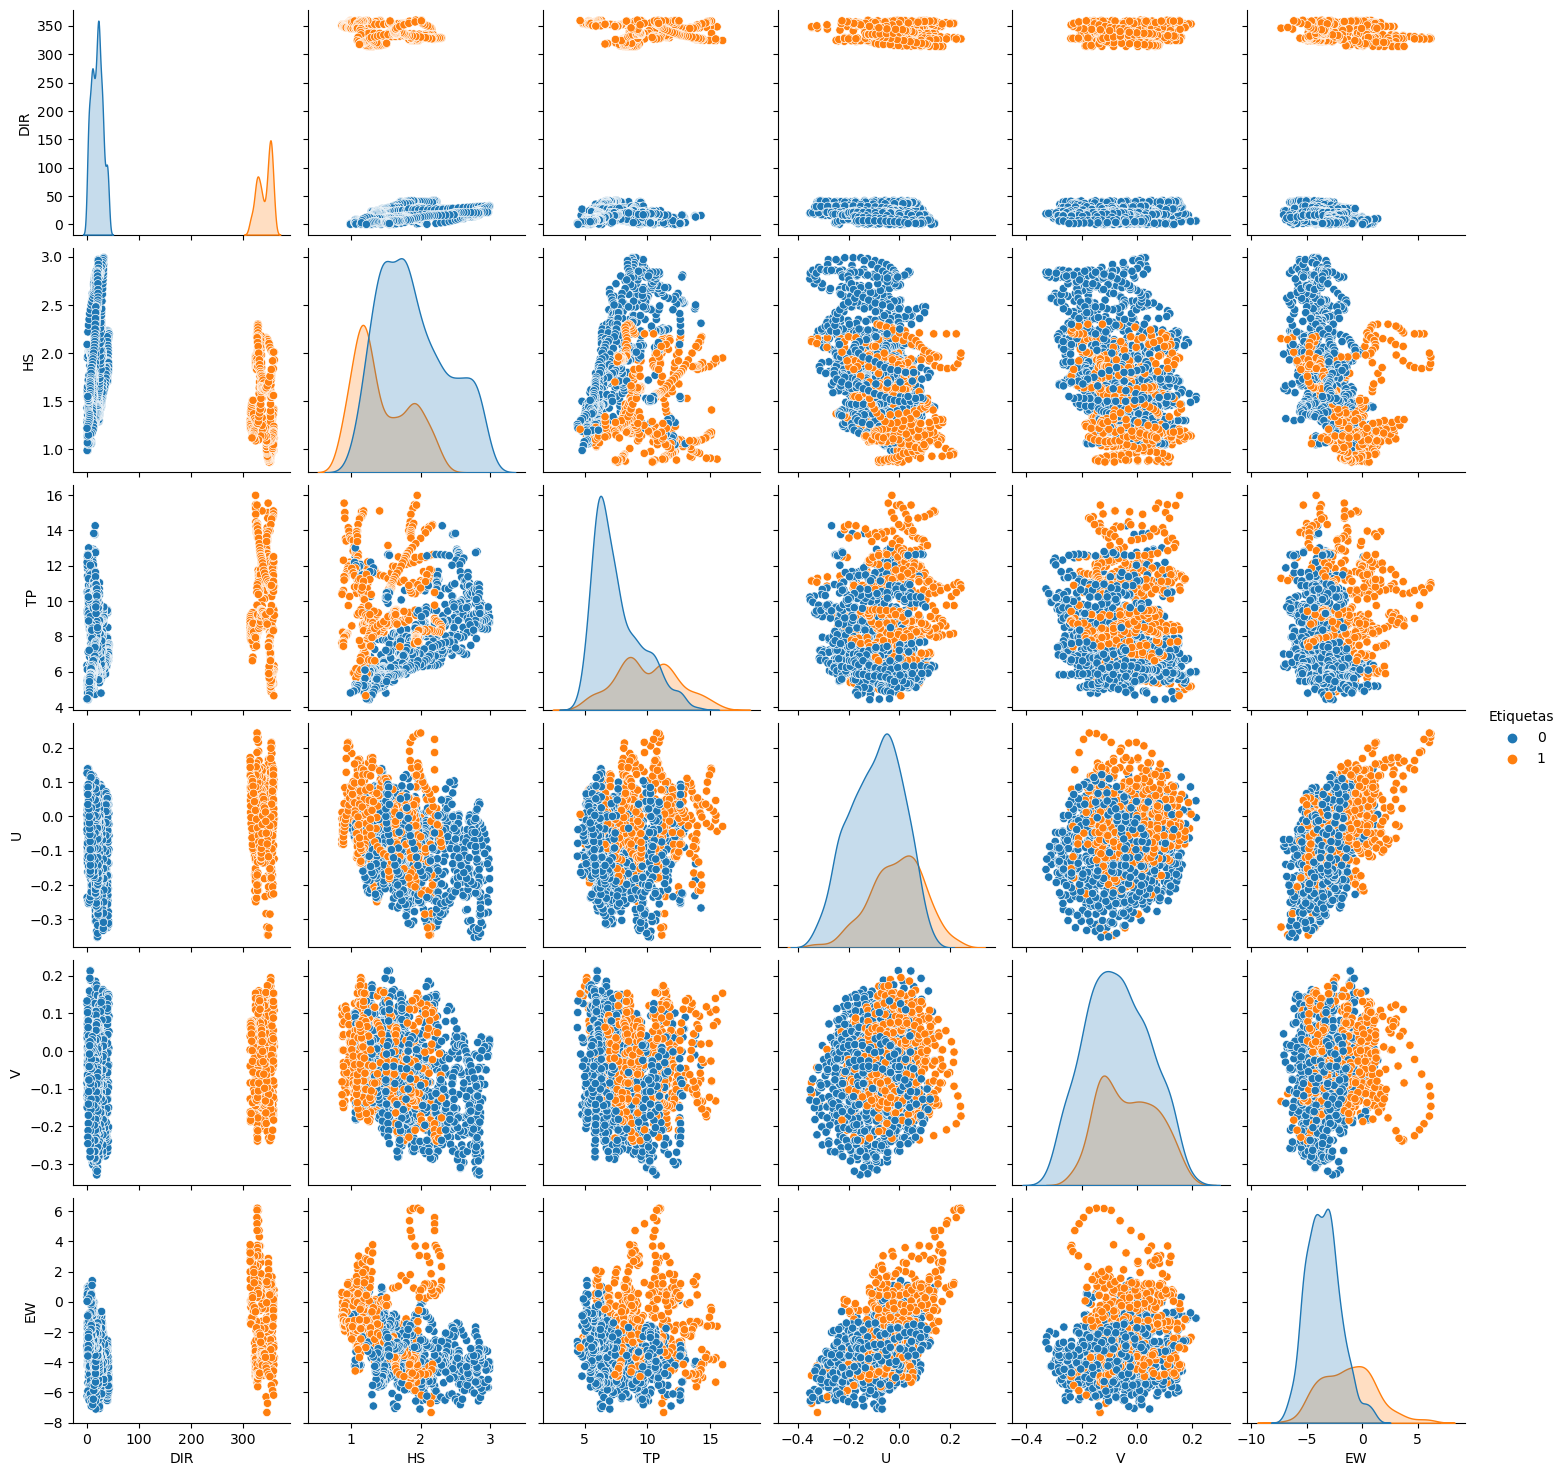

In [53]:
X_c=pd.DataFrame({'DIR':DIR,'HS':HS,'TP':TP,'U':Ur,'V':Vr,'EW':EW,'Etiquetas':etiquetas_db})

sns.pairplot(X_c,hue="Etiquetas",palette='tab10')